In [44]:
import numpy as np
import pandas as pd
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans, SpectralClustering
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn import metrics
# from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, rand_score
# from sklearn.metrics.cluster import contingency_matrix
import random

In [45]:
Q4_VISUALIZATION_BASE_PATH = '../../vizualizations/Q4/'

In [46]:
class CustomDataset:
    def __init__(self, data, target):
        self.data = data
        self.target = target

In [47]:
def get_dataset(name='iris'):
    if name == 'iris':
        data = load_iris()
        return data
    if name == 'customer-amex':
        data = CustomDataset(
            pd.read_csv('../../data/customer-amex/train_data.csv', nrows=1000),
            pd.read_csv('../../data/customer-amex/train_labels.csv', nrows=1000)
        )
        return data
    

def get_tsne(X):

    X_embedded = TSNE(learning_rate='auto', init='random', random_state=32).fit_transform(X)
    return X_embedded

def get_tsne_plot(X, Y, title='TSNE Plot', save=False, img_name=None):
    data_embedded_combined = pd.DataFrame(data=np.c_[X, Y], columns=['x', 'y'] + ['target'])
    sbn.scatterplot(data=data_embedded_combined, x='x', y='y', hue='target')
    plt.title(title)
    plt.show()
    if(save == True):
        plt.savefig(Q4_VISUALIZATION_BASE_PATH + img_name, background='w', bbox_inches='tight')


Metrics

In [48]:
def adjusted_rand_index(labels, clusters):
    return metrics.adjusted_rand_score(labels, clusters)

def adjusted_mutual_information(labels, clusters):
    return metrics.adjusted_mutual_info_score(labels, clusters)

def purity_score(labels, clusters):
    cont_matrix = metrics.cluster.contingency_matrix(labels, clusters)
    return np.sum(np.amax(cont_matrix, axis=0)) / np.sum(cont_matrix)

def silhoutte_coefficient(X, clusters):
    return metrics.silhouette_score(X, clusters)

def calinski_harabasz_index(X, clusters):
    return metrics.calinski_harabasz_score(X, clusters)

def davies_bouldin_index(X, clusters):
    return metrics.davies_bouldin_score(X, clusters)

def extrinsic_measures(labels, clusters):
    return {
        'adjusted_rand_index': adjusted_rand_index(labels, clusters),
        'adjusted_mutual_information': adjusted_mutual_information(labels, clusters),
        'purity': purity_score(labels, clusters)
    }

def intrinsic_measures(X, clusters):
    return {
        'silhoutte_coefficient': silhoutte_coefficient(X, clusters),
        'calinski_harabasz_index': calinski_harabasz_index(X, clusters),
        'davies_bouldin_index': davies_bouldin_index(X, clusters)
    }

K-Means

In [49]:
def get_kmeans_model(n_clusters, n_init=10, max_iter=300):
    model = KMeans(n_clusters, n_init=n_init, max_iter=max_iter)
    return model
def perform_kmeans_clustering(model, X):
    model.fit(X)
    clusters = model.labels_
    return model, clusters

K-Medoids

In [50]:
def get_kmedoids_model(n_clusters, metric='euclidean', method='pam', init='heuristic', max_iter=200):
    model = KMedoids(n_clusters=n_clusters, metric=metric, method=method, init=init, max_iter=max_iter)
    return model
def perform_kmedoids_clustering(model, X):
    model.fit(X)
    clusters = model.labels_
    return model, clusters

Spectral

Random

In [51]:
def perform_random_clustering(n_clusters, X):
    clusters = []
    for i in range(X.shape[0]):
        cluster_i = random.randint(0, n_clusters - 1)
        clusters.append(cluster_i)
    return clusters

IRIS

In [52]:
iris = get_dataset('iris')
X_iris = iris.data
Y_iris = iris.target
X_iris_embedded = get_tsne(X_iris)

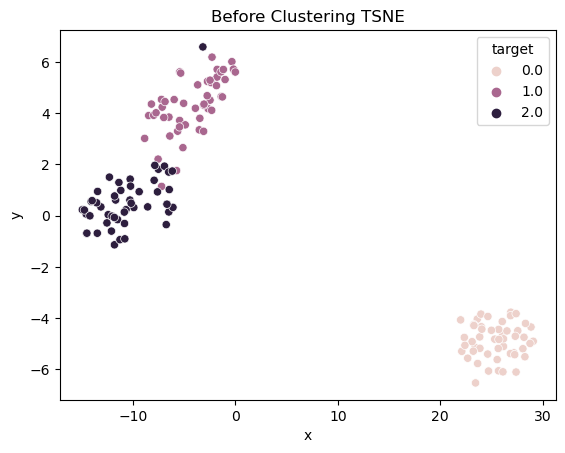

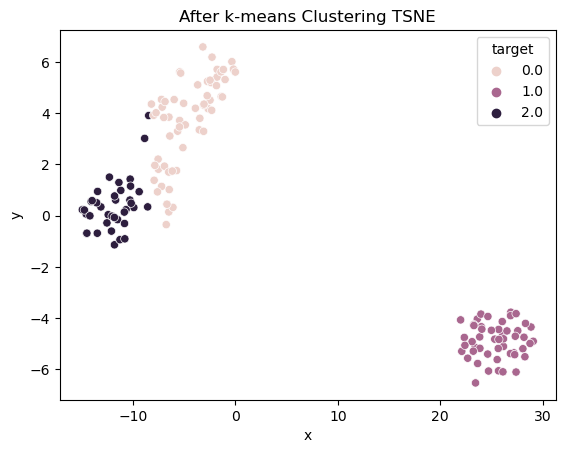

{'adjusted_rand_index': 0.7302382722834697, 'adjusted_mutual_information': 0.7551191675800484, 'purity': 0.8933333333333333}
{'silhoutte_coefficient': 0.5528190123564095, 'calinski_harabasz_index': 561.62775662962, 'davies_bouldin_index': 0.6619715465007484}


In [53]:
kmeans_model_iris = get_kmeans_model(n_clusters=3)
kmeans_model_iris, kmeans_clusters_iris = perform_kmeans_clustering(kmeans_model_iris, X_iris)
get_tsne_plot(X_iris_embedded, Y_iris, title="Before Clustering TSNE")
get_tsne_plot(X_iris_embedded, kmeans_clusters_iris, title="After k-means Clustering TSNE")
print(extrinsic_measures(Y_iris, kmeans_clusters_iris))
print(intrinsic_measures(X_iris, kmeans_clusters_iris))

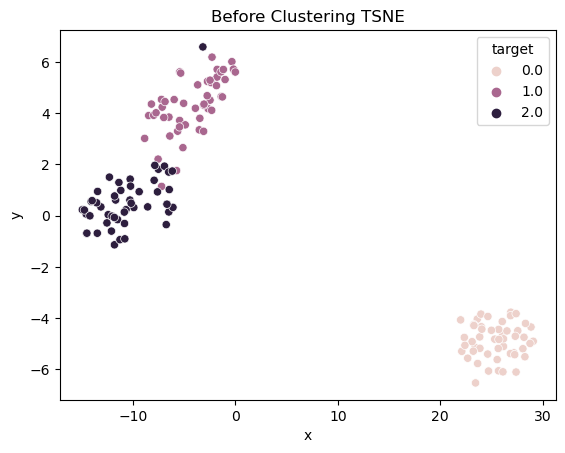

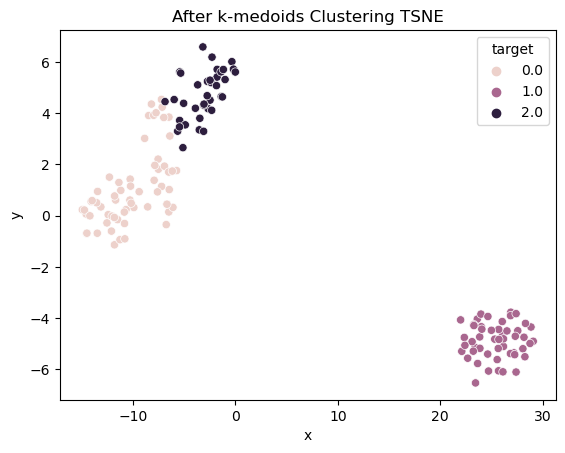

{'adjusted_rand_index': 0.7583384522539416, 'adjusted_mutual_information': 0.7829561199671795, 'purity': 0.9066666666666666}
{'silhoutte_coefficient': 0.5201984013106983, 'calinski_harabasz_index': 521.5609065033622, 'davies_bouldin_index': 0.668624441042894}


In [54]:
kmedoids_model_iris = get_kmedoids_model(n_clusters=3)
kmedoids_model_iris, kmedoids_clusters_iris = perform_kmedoids_clustering(kmedoids_model_iris, X_iris)
get_tsne_plot(X_iris_embedded, Y_iris, title="Before Clustering TSNE")
get_tsne_plot(X_iris_embedded, kmedoids_clusters_iris, title="After k-medoids Clustering TSNE")
print(extrinsic_measures(Y_iris, kmedoids_clusters_iris))
print(intrinsic_measures(X_iris, kmedoids_clusters_iris))

[1, 1, 0, 2, 2, 0, 0, 1, 0, 0, 0, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 0, 1, 2, 1, 0, 1, 0, 2, 1, 1, 2, 0, 2, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0]


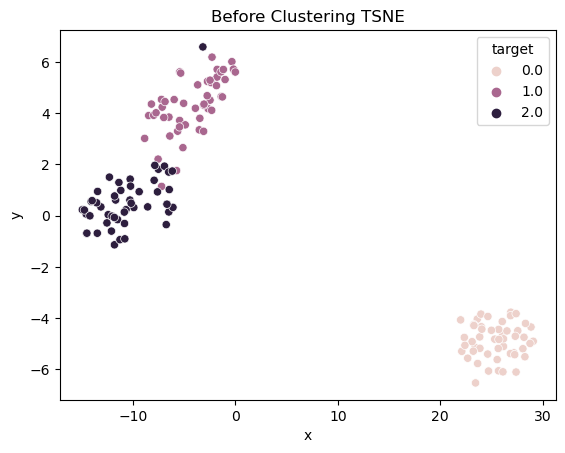

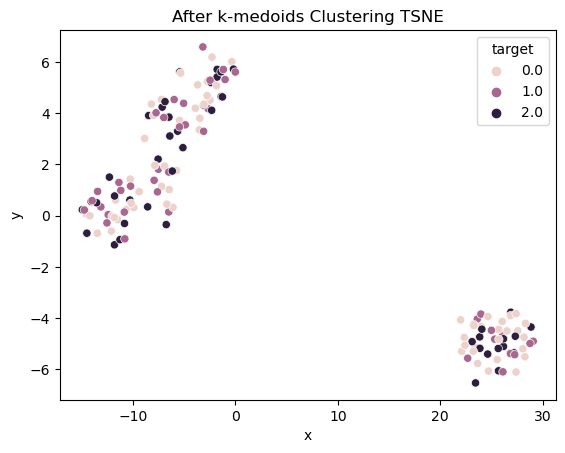

{'adjusted_rand_index': -0.004901030158839156, 'adjusted_mutual_information': -0.004641763195242509, 'purity': 0.3933333333333333}
{'silhoutte_coefficient': -0.04216249151354249, 'calinski_harabasz_index': 0.3160648352323288, 'davies_bouldin_index': 25.926460302377283}


In [56]:
random_clusters_iris = perform_random_clustering(3, X_iris)
print(random_clusters_iris)
get_tsne_plot(X_iris_embedded, Y_iris, title="Before Clustering TSNE")
get_tsne_plot(X_iris_embedded, random_clusters_iris, title="After k-medoids Clustering TSNE")
print(extrinsic_measures(Y_iris, random_clusters_iris))
print(intrinsic_measures(X_iris, random_clusters_iris))

Dataset-1

Dataset-2

Dataset-3